In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas.plotting import autocorrelation_plot, lag_plot
import seaborn as sns

In [2]:
df = pd.read_csv("daily-minimum-temperatures-in-me.csv", index_col=0, delimiter=",", parse_dates=["Date"])
df.columns = ["daily-min-temperature"]
df["daily-min-temperature"] = df["daily-min-temperature"].apply(lambda item: item.replace("?",""))
df["daily-min-temperature"] = pd.to_numeric(df["daily-min-temperature"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3650 entries, 1981-01-01 to 1990-12-31
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   daily-min-temperature  3650 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB


<AxesSubplot:xlabel='Date'>

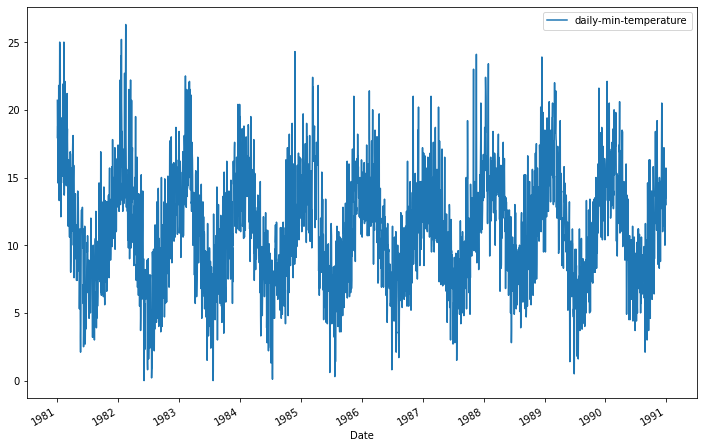

In [4]:
df.plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

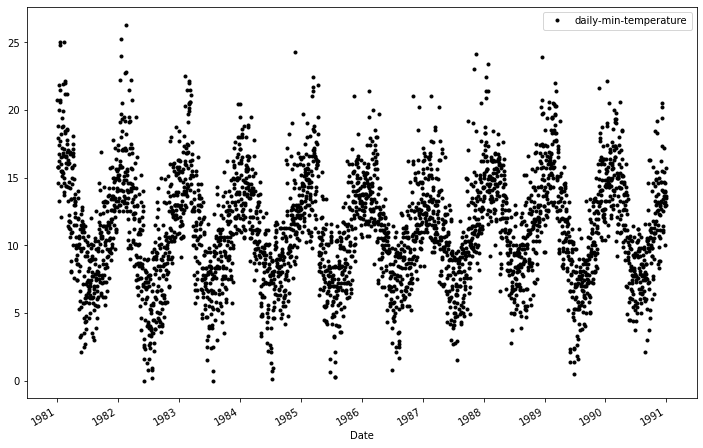

In [5]:
df.plot(figsize=(12,8), style="k.")

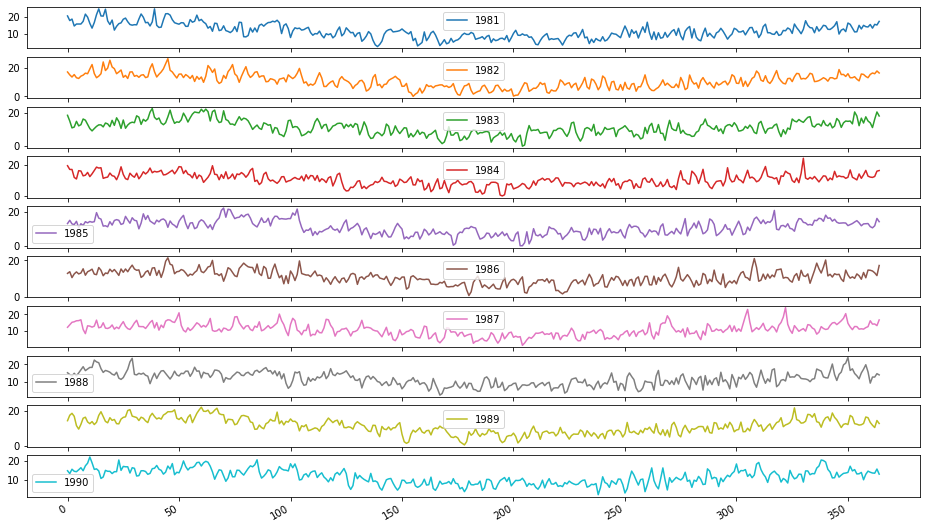

In [6]:
groups = df.groupby(Grouper(freq='A'))
year_df = pd.DataFrame()
for name, group in groups:
    year_df[name.year] = group.values.reshape(-1)
    
_ = year_df.plot(subplots=True, figsize=(16,10))

array([[<AxesSubplot:title={'center':'daily-min-temperature'}>]],
      dtype=object)

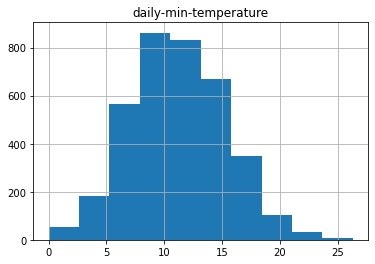

In [7]:
df.hist()

<AxesSubplot:ylabel='Density'>

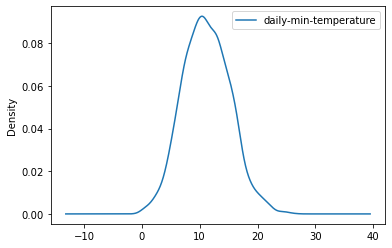

In [8]:
df.plot(kind='kde')

<AxesSubplot:>

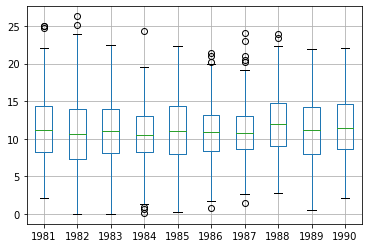

In [9]:
year_df.boxplot()

       0     0     0     0     0     0     0     0     0     0     0     0
0   14.3  16.1  20.4  13.3  14.2   2.3   6.0   3.7   8.8  10.5   8.1  16.3
1   17.4  14.4  22.0  15.1  14.6   1.4   7.1   7.5   8.8   6.2  10.0  18.3
2   18.5  16.3  19.7  14.2  11.8   2.1   9.7   8.1   6.1   5.1   8.5  13.7
3   16.8  15.7  19.6  14.2  14.4   6.6   6.9   8.4   8.6   9.5  12.5  13.3
4   11.5  14.2  20.3  19.2  10.4   8.9   5.3   7.1   8.9  11.7  15.0  10.6
5    9.5  13.2  18.3  12.6  10.3   7.8   7.0   7.6   7.8   9.2  13.3  14.1
6   12.2  16.8  18.9  14.2  10.8   9.0   6.2   7.6   5.0   7.3  11.0  16.0
7   15.7  18.5  20.3  11.9  10.5  10.3   7.0   5.6   7.0   9.7  11.9  16.5
8   16.3  16.7  21.4  13.9   9.5   7.9   9.7   7.0  13.3   9.4   8.3  14.1
9   13.6  15.3  18.3  13.5  12.5   7.2   8.0  10.5   7.9  10.0   9.7  18.7
10  12.6  15.9  17.8  15.3  13.7   8.6   8.5   7.3   7.5  10.9  11.3  16.2
11  13.8  15.2  17.7  13.9  12.7   8.8   7.1   7.8   8.3  11.0  12.5  14.8
12  12.1  17.5  12.8  14.

<AxesSubplot:>

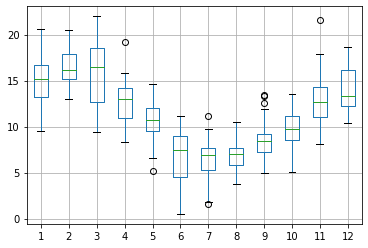

In [10]:
groups = df['1989'].groupby(Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
print(months)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()

<AxesSubplot:>

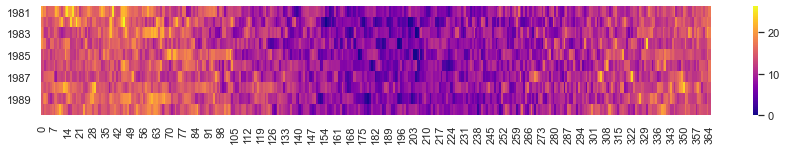

In [11]:
sns.set()
fig = plt.figure(figsize=(15,2))
sns.heatmap(year_df.T, cmap='plasma')
# plt.matshow(year_df.T, interpolation=None, aspect=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


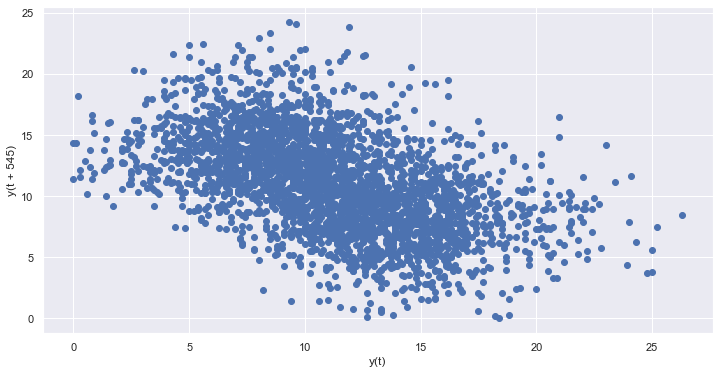

In [24]:
fig = plt.figure(figsize=(12,6))
_ = lag_plot(df["daily-min-temperature"], lag=365+180)
_ = plt.show()

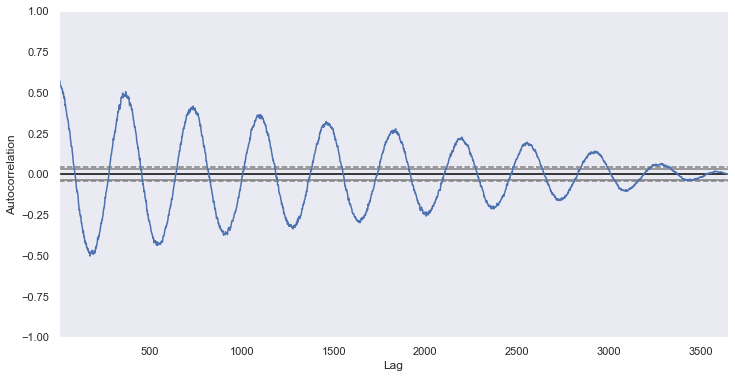

In [30]:
fig = plt.figure(figsize=(12,6))
_ = autocorrelation_plot(df["daily-min-temperature"])
_ = plt.show()

# Resampling

In [103]:
# define parser
from datetime import datetime
import calendar

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# df = pd.read_csv("shampo-sales.csv", header=0, index_col=0, parse_dates=True, date_parser=parser)
df = pd.read_csv("shampo-sales.csv", delimiter="\t", index_col=0, header=0, parse_dates=True, date_parser=parser)
df

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


In [108]:
upsampled = df.resample('1D').mean()

In [110]:
upsampled.head(32)

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
1901-01-06,NaN
1901-01-07,NaN
1901-01-08,NaN
1901-01-09,NaN


In [114]:
interpolated = upsampled.interpolate('linear')
interpolated = upsampled.interpolate('spline', order=2)

In [115]:
interpolated.head(32)

,Sales
Month,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746
1901-01-06,231.727880
1901-01-07,225.575149
1901-01-08,219.651553
1901-01-09,213.957094


<AxesSubplot:xlabel='Month'>

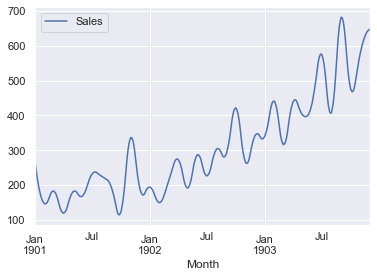

In [116]:
interpolated.plot()

In [119]:
downsampled = df.resample('Q').sum()

<AxesSubplot:xlabel='Month'>

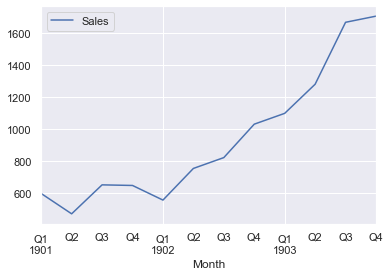

In [120]:
downsampled.plot()

## Power transform

Data transforms are intended to remove noise and improve the signal in time series forecasting.

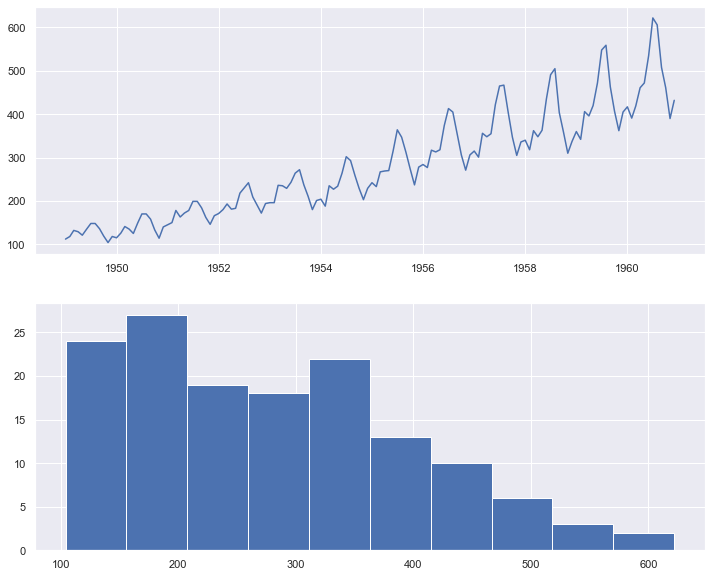

In [138]:
df = pd.read_csv("airline-passengers.csv", delimiter="\t", header=0, index_col=0, parse_dates=True)
figure = plt.figure(figsize=(12,10))
_ = plt.subplot(211)
_ = plt.plot(df['passengers'])
_ = plt.subplot(212)
_ = plt.hist(df['passengers'])
_ = plt.show()

## Square Root Transform

In [147]:
def plot_line_hist(series):
    fig = plt.figure(figsize=(12,10))
    _ = plt.subplot(211)
    _ = plt.plot(series)
    _ = plt.subplot(212)
    _ = plt.hist(series)
    _ = plt.show()    

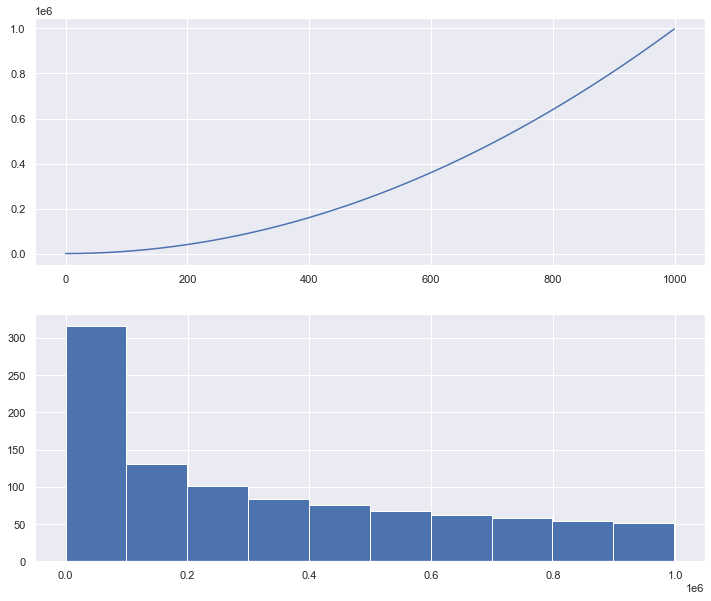

In [148]:
series = [i**2 for i in range(1000)]
plot_line_hist(series)

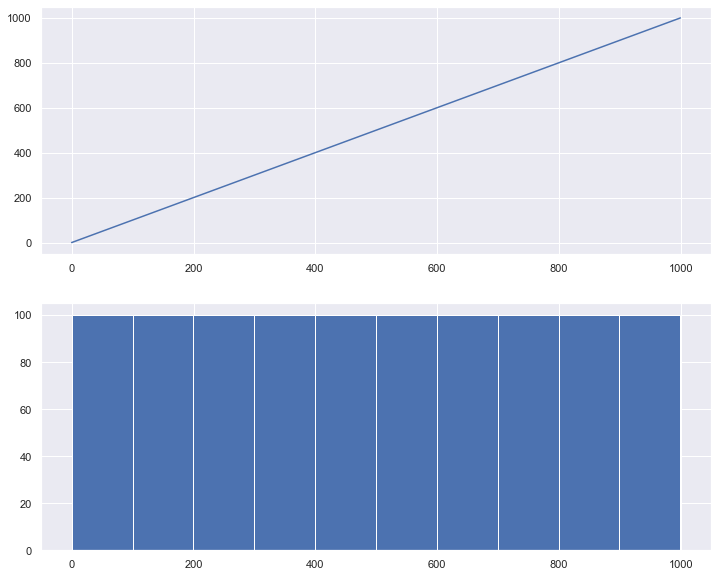

In [149]:
series = [i**2 for i in range(1000)]
sqrt_transformed = np.sqrt(series)
plot_line_hist(sqrt_transformed)

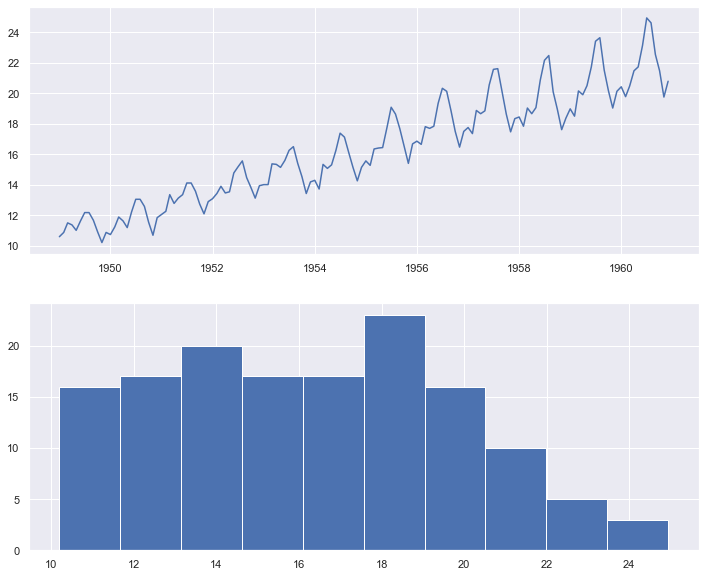

In [154]:
df["passengers-sqrt"] = np.sqrt(df["passengers"])
plot_line_hist(df["passengers-sqrt"])

## Log Transform

Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform. 

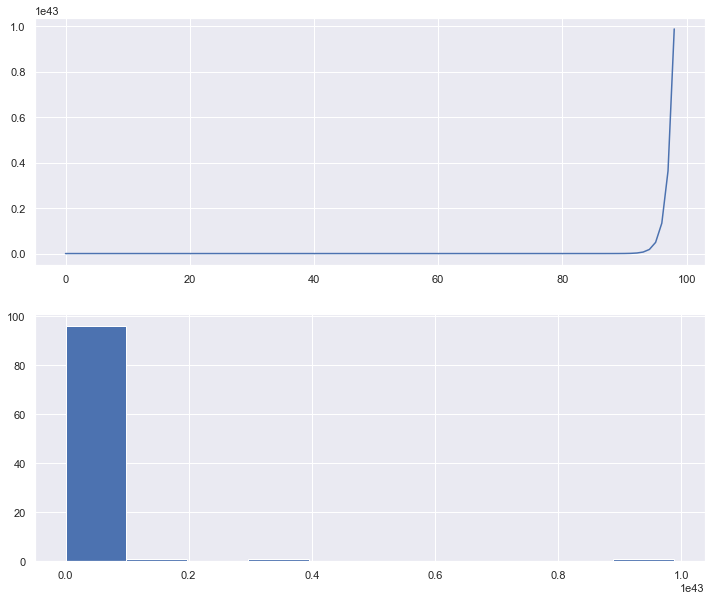

In [172]:
series = [i for i in range(1,100)]
series = np.exp(series)
plot_line_hist(series)

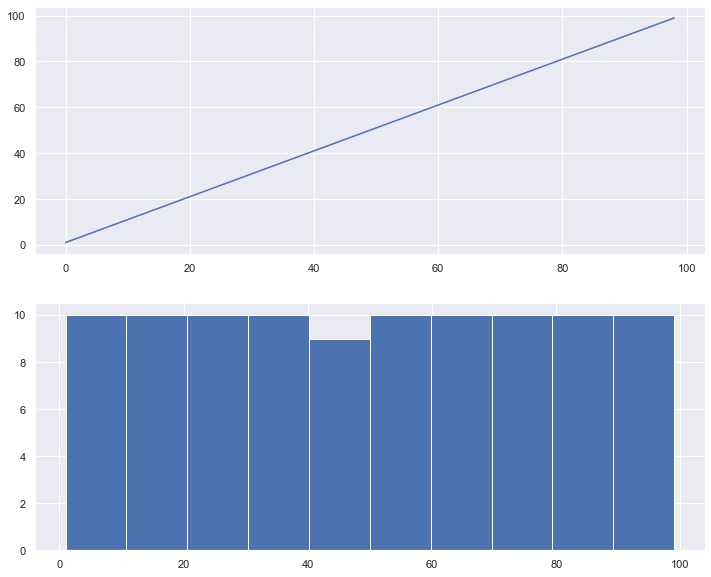

In [173]:
log_transformed = np.log(series)
plot_line_hist(log_transformed)

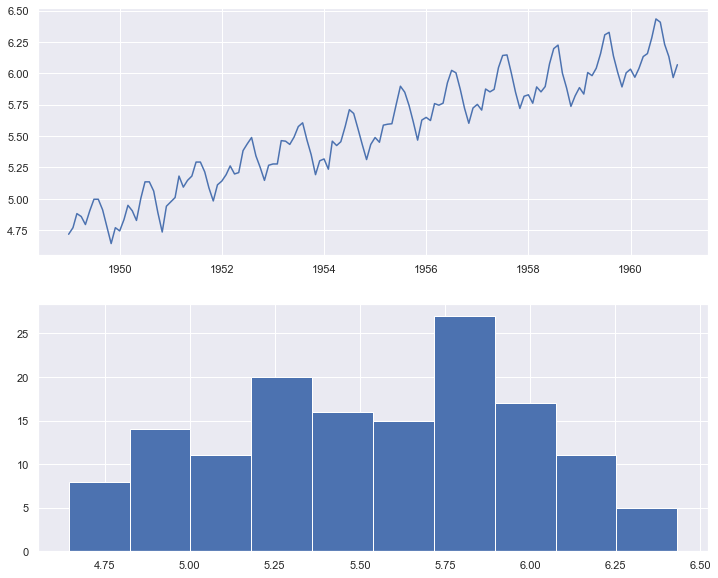

In [175]:
df["passengers-log"] = np.log(df["passengers"])
plot_line_hist(df["passengers-log"])

**Log** transform is usually used to remove exponential trends from times series data. To apply **Log** transform, the values of the series must be non-negative. Therefore time series data with negative values we can do:

$$\rm{transform} = \log (\rm{constant} + x)$$

## Box-Cox Transform

- lambda = -1.0 is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.


In [176]:
from scipy.stats import boxcox

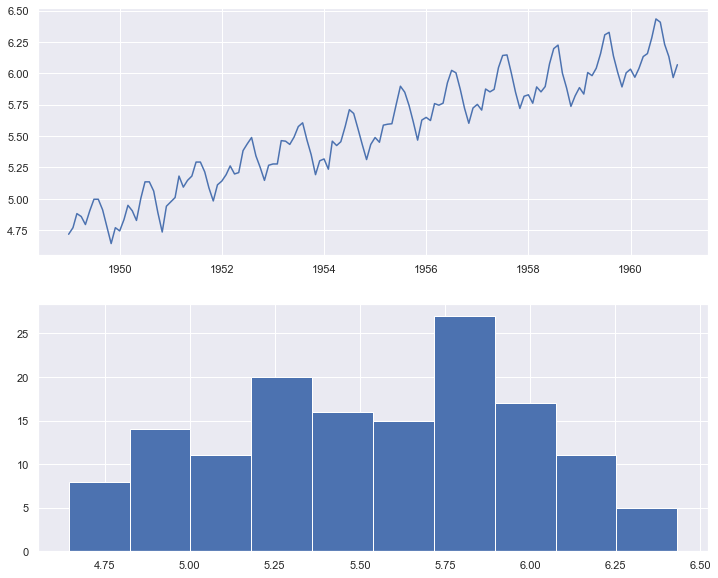

In [181]:
df['passengers-boxcox'] = boxcox(df['passengers'], lmbda=0.0)
plot_line_hist(df["passengers-boxcox"])

lambda = 0.14802265137037945


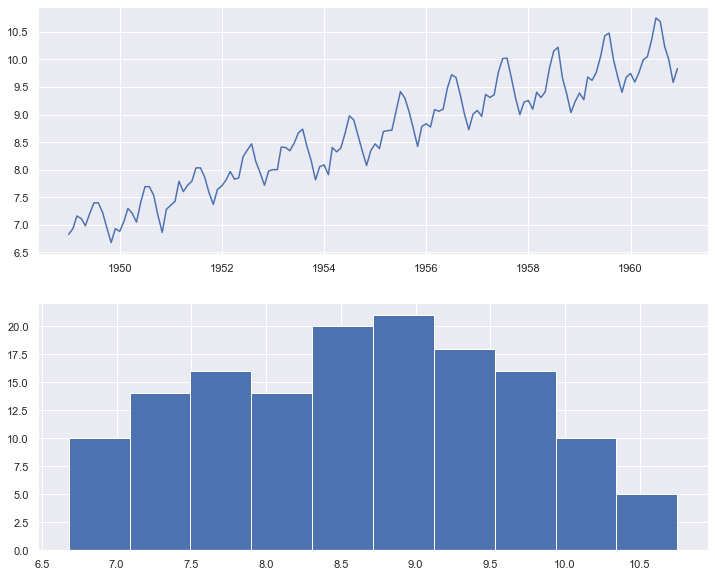

In [185]:
df['passengers-boxcox'], lmbda = boxcox(df['passengers'], lmbda=None)
print(f"lambda = {lmbda}")
plot_line_hist(df["passengers-boxcox"])